eliminate variables insignificant

gridsearch Lasso search for best alpha parameter

interpret results


In [58]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import patsy

df1 = pd.read_csv('../../datasets/merged_per_year/merged_1996-97')
df2 = pd.read_csv('../../datasets/merged_per_year/merged_1997-98')

In [59]:
df1.columns.tolist()

['Unnamed: 0',
 'PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'AGE',
 'GP',
 'W',
 'L',
 'W_PCT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'SEASON',
 'PCT_FGA_2PT',
 'PCT_FGA_3PT',
 'PCT_PTS_2PT',
 'PCT_PTS_2PT_MR',
 'PCT_PTS_3PT',
 'PCT_PTS_FB',
 'PCT_PTS_FT',
 'PCT_PTS_OFF_TOV',
 'PCT_PTS_PAINT',
 'PCT_AST_2PM',
 'PCT_UAST_2PM',
 'PCT_AST_3PM',
 'PCT_UAST_3PM',
 'PCT_AST_FGM',
 'PCT_UAST_FGM',
 'opp_lessthan5ft_FGM',
 'opp_lessthan5ft_FGA',
 'opp_lessthan5ft_FG_PCT',
 'opp_5_9ft_FGM',
 'opp_5_9ft_FGA',
 'opp_5_9ft_FG_PCT',
 'opp_10_14ft_FGM',
 'opp_10_14ft_FGA',
 'opp_10_14ft_FG_PCT',
 'opp_15_19ft_FGM',
 'opp_15_19ft_FGA',
 'opp_15_19ft_FG_PCT',
 'opp_20_24ft_FGM',
 'opp_20_24ft_FGA',
 'opp_20_24ft_FG_PCT',
 'opp_25_29ft_FGM',
 'opp_25_29ft_FGA',
 'opp_25_29ft_FG_PCT',
 'opp_30_34ft_FGM',
 'opp_30_34ft_FGA',
 '

In [60]:
columns = ['GP',
           'W_PCT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
           'PCT_FGA_2PT',
 'PCT_FGA_3PT',
 'PCT_PTS_2PT',
 'PCT_PTS_2PT_MR',
 'PCT_PTS_3PT',
 'PCT_PTS_FB',
 'PCT_PTS_FT',
 'PCT_PTS_OFF_TOV',
 'PCT_PTS_PAINT',
 'PCT_AST_2PM',
 'PCT_UAST_2PM',
 'PCT_AST_3PM',
 'PCT_UAST_3PM',
 'PCT_AST_FGM',
 'PCT_UAST_FGM',
 'opp_lessthan5ft_FGM',
 'opp_lessthan5ft_FGA',
 'opp_lessthan5ft_FG_PCT',
 'opp_5_9ft_FGM',
 'opp_5_9ft_FGA',
 'opp_5_9ft_FG_PCT',
 'opp_10_14ft_FGM',
 'opp_10_14ft_FGA',
 'opp_10_14ft_FG_PCT',
 'opp_15_19ft_FGM',
 'opp_15_19ft_FGA',
 'opp_15_19ft_FG_PCT',
 'opp_20_24ft_FGM',
 'opp_20_24ft_FGA',
 'opp_20_24ft_FG_PCT',
 'opp_25_29ft_FGM',
 'opp_25_29ft_FGA',
 'opp_25_29ft_FG_PCT',
 'lessthan5ft_FGM',
 'lessthan5ft_FGA',
 'lessthan5ft_FG_PCT',
 '5_9ft_FGM',
 '5_9ft_FGA',
 '5_9ft_FG_PCT',
 '10_14ft_FGM',
 '10_14ft_FGA',
 '10_14ft_FG_PCT',
 '15_19ft_FGM',
 '15_19ft_FGA',
 '15_19ft_FG_PCT',
 '20_24ft_FGM',
 '20_24ft_FGA',
 '20_24ft_FG_PCT',
 '25_29ft_FGM',
 '25_29ft_FGA',
 '25_29ft_FG_PCT',
 'PLAYER_HEIGHT_INCHES',
 'PLAYER_WEIGHT',
 'NET_RATING',
 'USG_PCT',
 'TS_PCT',
 'B2B_COUNT',
 '3GMS_IN_4DAYS',
 '4GMS_IN_5DAYS', 
 'PACE',
 'PIE']

columns

['GP',
 'W_PCT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'PCT_FGA_2PT',
 'PCT_FGA_3PT',
 'PCT_PTS_2PT',
 'PCT_PTS_2PT_MR',
 'PCT_PTS_3PT',
 'PCT_PTS_FB',
 'PCT_PTS_FT',
 'PCT_PTS_OFF_TOV',
 'PCT_PTS_PAINT',
 'PCT_AST_2PM',
 'PCT_UAST_2PM',
 'PCT_AST_3PM',
 'PCT_UAST_3PM',
 'PCT_AST_FGM',
 'PCT_UAST_FGM',
 'opp_lessthan5ft_FGM',
 'opp_lessthan5ft_FGA',
 'opp_lessthan5ft_FG_PCT',
 'opp_5_9ft_FGM',
 'opp_5_9ft_FGA',
 'opp_5_9ft_FG_PCT',
 'opp_10_14ft_FGM',
 'opp_10_14ft_FGA',
 'opp_10_14ft_FG_PCT',
 'opp_15_19ft_FGM',
 'opp_15_19ft_FGA',
 'opp_15_19ft_FG_PCT',
 'opp_20_24ft_FGM',
 'opp_20_24ft_FGA',
 'opp_20_24ft_FG_PCT',
 'opp_25_29ft_FGM',
 'opp_25_29ft_FGA',
 'opp_25_29ft_FG_PCT',
 'lessthan5ft_FGM',
 'lessthan5ft_FGA',
 'lessthan5ft_FG_PCT',
 '5_9ft_FGM',
 '5_9ft_FGA',
 '5_9ft_FG_PCT',
 '10_14ft_FGM',
 '10_14ft_FGA',
 '10_14ft_FG

In [61]:
def top_players(df, num_of_players=10, column='MIN'):
    return df.sort_values(by=column, ascending=False)[:num_of_players]

group1 = df1.groupby('TEAM_ABBREVIATION').apply(top_players)
group2 = df2.groupby('TEAM_ABBREVIATION').apply(top_players)

print group1.shape, group2.shape
# group1.dropna(inplace=True)
# group2.dropna(inplace=True)
# print group1.shape, group2.shape

(290, 101) (290, 101)


In [62]:
subset_96 = group1[columns].reset_index()
subset_97 = group2[columns].reset_index()
target = 'GP'

print subset_96.shape, subset_97.shape
subset_96.dropna(inplace=True)
subset_97.dropna(inplace=True)
print subset_96.shape, subset_97.shape

(290, 87) (290, 87)
(289, 87) (290, 87)


In [63]:
subset_96.head()

,TEAM_ABBREVIATION,level_1,GP,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,NET_RATING,USG_PCT,TS_PCT,B2B_COUNT,3GMS_IN_4DAYS,4GMS_IN_5DAYS,PACE,PIE
0,ATL,394,72,0.694,40.2,6.8,15.9,0.429,1.8,5.4,...,80.0,215.0,7.4,0.253,0.548,22,26,3,86.49,0.114
1,ATL,314,78,0.679,40.2,6.4,14.9,0.432,2.8,7.7,...,73.0,185.0,10.5,0.221,0.548,22,26,3,86.48,0.149
2,ATL,80,82,0.683,39.3,6.7,13.8,0.486,0.4,1.1,...,83.0,245.0,11.0,0.236,0.562,22,26,3,85.73,0.143
3,ATL,124,80,0.675,38.2,4.8,9.0,0.526,0.0,0.0,...,86.0,250.0,8.1,0.179,0.584,22,26,3,85.04,0.148
4,ATL,420,70,0.700,33.9,3.6,8.6,0.422,1.1,3.0,...,78.0,225.0,10.5,0.153,0.514,22,26,3,86.10,0.076


In [64]:
trainy = subset_96.GP.values
trainX = subset_96.iloc[:,3:]
testy = group2.GP.values
testX = subset_97.iloc[:,3:]
print trainy.shape, trainX.shape
print testy.shape, testX.shape


(289,) (289, 84)
(290,) (290, 84)


In [104]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ss = StandardScaler()
trainXn = ss.fit_transform(trainX)


In [106]:
lin = LinearRegression()
model = lin.fit(trainXn, trainy)
score = model.score(testX, testy)

print score

-49946.8019308


In [79]:
print len(model.predict(testX))
zip(group2.PLAYER_NAME.values, model.predict(testX))

290


[('Steven Smith', 77.47265358915422),
 ('Mookie Blaylock', 79.439661017354069),
 ('Dikembe Mutombo', 74.634383284138636),
 ('Tyrone Corbin', 77.026523889557367),
 ('Christian Laettner', 69.534154730597777),
 ('Alan Henderson', 66.667970459944058),
 ('Eldridge Recasner', 64.892972558654293),
 ('Chucky Brown', 56.945311985337156),
 ('Ed Gray', 53.007611434626419),
 ('Brian Oliver', 52.540363289363299),
 ('Antoine Walker', 67.649929619387606),
 ('Ron Mercer', 69.616604597763356),
 ('Kenny Anderson', 68.727844899193826),
 ('Walter McCarty', 64.849632461156091),
 ('Bruce Bowen', 61.327401407688974),
 ('Dana Barros', 59.697711842934226),
 ('Travis Knight', 56.698673133919606),
 ('Andrew DeClercq', 56.218317871596511),
 ('Zan Tabak', 52.20022962845136),
 ('Greg Minor', 55.109956435655867),
 ('Glen Rice', 78.278530874165853),
 ('Anthony Mason', 75.885644812005836),
 ('David Wesley', 74.834301723602096),
 ('Bobby Phills', 70.721138749867976),
 ('Vlade Divac', 65.998229311482561),
 ('Matt Geiger

In [82]:
zip(trainX.columns, model.coef_)

[('W_PCT', 0.0),
 ('MIN', 1.4071739691057974),
 ('FGM', 0.0),
 ('FGA', -0.55872475731943116),
 ('FG_PCT', 0.0),
 ('FG3M', 0.0),
 ('FG3A', -0.0),
 ('FG3_PCT', 0.0),
 ('FTM', -0.0),
 ('FTA', -0.12333672091526533),
 ('FT_PCT', 0.0),
 ('OREB', -0.0),
 ('DREB', -0.0),
 ('REB', -0.42864415178670057),
 ('AST', -0.4732922490689136),
 ('TOV', -0.0),
 ('STL', -0.0),
 ('BLK', 0.0),
 ('BLKA', -0.0),
 ('PF', 0.0),
 ('PFD', -0.0),
 ('PTS', -0.0),
 ('PLUS_MINUS', -0.027534320581790811),
 ('PCT_FGA_2PT', -0.0),
 ('PCT_FGA_3PT', 0.0),
 ('PCT_PTS_2PT', -0.0),
 ('PCT_PTS_2PT_MR', -0.0),
 ('PCT_PTS_3PT', 0.0),
 ('PCT_PTS_FB', -0.0),
 ('PCT_PTS_FT', 0.0),
 ('PCT_PTS_OFF_TOV', 0.0),
 ('PCT_PTS_PAINT', -0.0),
 ('PCT_AST_2PM', 0.0),
 ('PCT_UAST_2PM', -0.0),
 ('PCT_AST_3PM', 0.0),
 ('PCT_UAST_3PM', 0.0),
 ('PCT_AST_FGM', 0.0),
 ('PCT_UAST_FGM', -0.0),
 ('opp_lessthan5ft_FGM', 0.0),
 ('opp_lessthan5ft_FGA', -0.33670438124664814),
 ('opp_lessthan5ft_FG_PCT', 0.0),
 ('opp_5_9ft_FGM', 0.0),
 ('opp_5_9ft_FGA', 0.0)

In [66]:
lin = LinearRegression()
mod = lin.fit(trainX, trainy)
print mod.score(testX, testy)

-0.299160343235


In [102]:
mod.coef_

array([ -1.66987434e+00,   1.80478556e+00,   6.01390177e+01,
         6.16349276e+00,  -9.95789979e+01,   2.97244627e+01,
         7.86328787e-01,  -2.29358103e+01,   3.17023541e+01,
        -8.66786392e+00,  -2.62557869e+01,  -1.50748668e+01,
        -1.57775888e+01,   1.39936467e+01,  -2.48278300e+00,
         3.72077529e+00,  -9.53837848e-03,   4.90335303e+00,
        -6.12119409e+00,   9.85452921e-01,   2.10800668e+01,
        -2.74909136e+01,   9.02846293e-01,  -6.19590613e+03,
        -6.25911601e+03,   6.56989004e+03,  -7.18839676e+03,
        -4.98222755e+02,  -6.90049300e+01,  -4.99966209e+02,
        -2.56813069e+01,  -7.13636277e+03,   1.33149087e+04,
         1.32793368e+04,   1.31560303e+01,   1.84943427e+01,
        -2.22943425e+04,  -2.22706981e+04,   1.75603524e+01,
        -1.08273244e+01,  -2.87367622e+02,   1.74089901e+01,
        -4.78988152e+00,  -1.65785381e+01,   2.43400046e+01,
        -1.12963291e+01,  -8.23144545e+01,   2.79466005e+01,
        -1.16476826e+01,

In [67]:
model.coef_

array([ 0.        ,  1.40717397,  0.        , -0.55872476,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.12333672,
        0.        , -0.        , -0.        , -0.42864415, -0.47329225,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.02753432, -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.33670438,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.05460099, -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.3006337 ,  0.        ,  0.        , -0.  

In [68]:
zip(trainX.columns, model.coef_)

[('W_PCT', 0.0),
 ('MIN', 1.4071739691057974),
 ('FGM', 0.0),
 ('FGA', -0.55872475731943116),
 ('FG_PCT', 0.0),
 ('FG3M', 0.0),
 ('FG3A', -0.0),
 ('FG3_PCT', 0.0),
 ('FTM', -0.0),
 ('FTA', -0.12333672091526533),
 ('FT_PCT', 0.0),
 ('OREB', -0.0),
 ('DREB', -0.0),
 ('REB', -0.42864415178670057),
 ('AST', -0.4732922490689136),
 ('TOV', -0.0),
 ('STL', -0.0),
 ('BLK', 0.0),
 ('BLKA', -0.0),
 ('PF', 0.0),
 ('PFD', -0.0),
 ('PTS', -0.0),
 ('PLUS_MINUS', -0.027534320581790811),
 ('PCT_FGA_2PT', -0.0),
 ('PCT_FGA_3PT', 0.0),
 ('PCT_PTS_2PT', -0.0),
 ('PCT_PTS_2PT_MR', -0.0),
 ('PCT_PTS_3PT', 0.0),
 ('PCT_PTS_FB', -0.0),
 ('PCT_PTS_FT', 0.0),
 ('PCT_PTS_OFF_TOV', 0.0),
 ('PCT_PTS_PAINT', -0.0),
 ('PCT_AST_2PM', 0.0),
 ('PCT_UAST_2PM', -0.0),
 ('PCT_AST_3PM', 0.0),
 ('PCT_UAST_3PM', 0.0),
 ('PCT_AST_FGM', 0.0),
 ('PCT_UAST_FGM', -0.0),
 ('opp_lessthan5ft_FGM', 0.0),
 ('opp_lessthan5ft_FGA', -0.33670438124664814),
 ('opp_lessthan5ft_FG_PCT', 0.0),
 ('opp_5_9ft_FGM', 0.0),
 ('opp_5_9ft_FGA', 0.0)

In [57]:
pwd

u'/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/code/models'

In [88]:
trainy

array([72, 78, 82, 80, 70, 53, 71, 58, 30, 24, 74, 82, 25, 76, 72, 24, 81,
       21, 23, 74, 73, 79, 81, 68, 65, 49, 60, 69, 61, 62, 82, 82, 55, 57,
       59, 76, 82, 75,  9, 72, 80, 78, 74, 69, 82, 82, 80, 70, 64, 56, 83,
       54, 56, 73, 83, 75, 28, 63, 23, 43, 55, 82, 74, 52, 82, 81, 60, 43,
       48, 67, 80, 79, 82, 79, 79, 83, 65, 76, 81, 47, 80, 80, 79, 70, 51,
       73, 49, 21, 61, 57, 53, 62, 78, 78, 82, 75, 52, 13, 52, 21, 82, 81,
       80, 50, 52, 82, 76,  4, 66, 62, 82, 80, 81, 82, 77, 82, 18, 59, 59,
       74, 51, 80, 79, 77, 54, 70, 64, 79, 58, 71, 81, 36, 66, 80, 69, 73,
       82, 78, 18, 48, 78, 80, 82, 79, 80, 82, 52, 82,  5, 70, 77, 81, 67,
       68, 82, 68, 82, 69, 55, 53, 82, 82, 77, 41, 61, 47, 79, 78, 62, 78,
       80, 76, 81, 65, 77, 79, 74, 68, 21, 59, 67, 74, 63, 66, 80, 82, 77,
       67, 45, 76, 81, 57, 82, 75, 62, 37, 59, 54, 82, 70, 55, 68, 80, 50,
       65, 77, 41, 53,  6, 81, 82, 76, 62, 69, 82, 81, 60, 47, 10, 81, 82,
       81, 66, 75, 24, 79

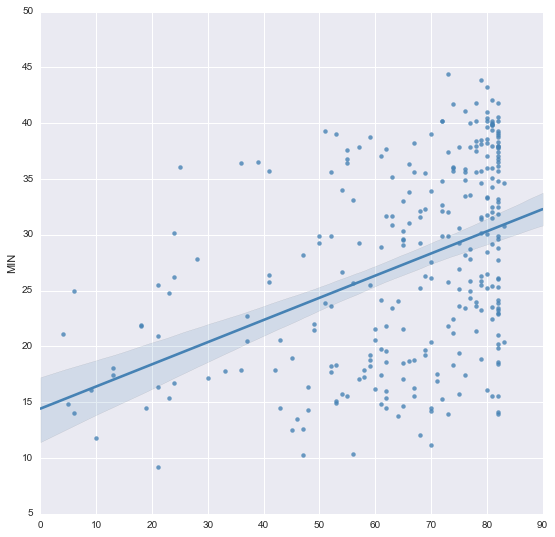

In [89]:
# columns highly correlated with GP: W, 
fig = plt.figure(figsize=(9,9))
ax = fig.gca()

ax = sns.regplot(trainy, trainX.MIN, fit_reg=True, color='steelblue', ax=ax)

plt.show()

In [101]:
trainx = subset_96[['MIN']]
lin = LinearRegression()
model = lin.fit(trainx, trainy)
print model.score(trainx, trainy)

0.17413067352


In [ ]:
# columns highly correlated with GP: W, 
fig = plt.figure(figsize=(9,9))
ax = fig.gca()

ax = sns.regplot(trainy, trainX.MIN, fit_reg=True, color='steelblue', ax=ax)

plt.show()

In [95]:
trainx.shape
trainy.shape

(289,)